<font size="5"><b><center>TOPIC MODELLING</center></b></font>

<font size="3"><b>LOADING A DATA SET</b></font>

In [3]:
import pandas as pd

# Read the text file into a DataFrame
df = pd.read_csv("C:/Users/srima/Downloads/YoutubeSpam.csv", delimiter='\t', header=None, names=['CONTENT'])

# Replace 'your_text_file.txt' with the path to your text file.
# Replace '\t' with the appropriate delimiter if your file uses a different separator.
# Replace ['Column1', 'Column2', ...] with the appropriate column names if known.

# Display the DataFrame
print(df)

                                               CONTENT
0                 COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1    LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Ju...
2    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,ad...
3    LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Ev...
4    z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Mel...
..                                                 ...
346  z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racas...
347  z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mo...
348  z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPl...
349  z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Edit...
350  z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Beni...

[351 rows x 1 columns]


C:\Users\srima\AppData\Local\Temp\ipykernel_22608\3127936886.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<font size="3"><b>PRINTING COUPLE OF TEXTS</b></font>

In [4]:
print(repr(df.iloc[46]["CONTENT"][0:400]))
print(repr(df.iloc[50]["CONTENT"][0:400]))

'z12ktfsarrv0wdj3p22ifbxz3zn2fthhw04,Dave X,2014-01-20T10:12:07,....subscribe......  ......to my........  .....channel.......\ufeff,1'
'z13nvr2xayrwffsio04cj3zwyuf3vb1imdg,Milan George,2014-01-20T16:15:09,thumbs up if u checked this video to see hw views it got\ufeff,0'


<font size="3"><b>SPLITING INTO SENTENCES</b></font>

In [5]:
import pandas as pd
import re

# Function to split text into paragraphs and count them
def count_paragraphs(CONTENT):
    paragraphs = re.split(r'\.\s*\n', CONTENT)
    return len(paragraphs)

# Applying the function to each row
df["number_of_paragraphs"] = df["CONTENT"].apply(count_paragraphs)
print(df)

                                               CONTENT  number_of_paragraphs
0                 COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS                     1
1    LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Ju...                     1
2    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,ad...                     1
3    LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Ev...                     1
4    z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Mel...                     1
..                                                 ...                   ...
346  z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racas...                     1
347  z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mo...                     1
348  z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPl...                     1
349  z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Edit...                     1
350  z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Beni...                     1

[351 rows x 2 columns]


<font size="3"><b>START BY GETTING TFIDF</b></font>

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['CONTENT'])
tfidf_text_vectors.shape


(351, 164)

<font size="3"><b>MAKING DATAFRAME OF SENTENCES</b></font>

In [7]:
file= "C:/Users/srima/Downloads/YoutubeSpam.csv"
df = pd.read_csv(file)
df = pd.DataFrame(df)

# flatten the paragraphs keeping the years
df["paragraphs"] = df["CONTENT"].map(lambda text: re.split(r'\.\s*\n', text))

# Flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "CONTENT": paragraph, "tweet_id": year } 
                              for paragraphs, year in zip(df["paragraphs"], df["COMMENT_ID"]) 
                              for paragraph in paragraphs if paragraph])

paragraph_df.head(10)


CONTENT  \
0  Huh, anyway check out this you[tube] channel: ...   
1  Hey guys check out my new channel and our firs...   
2             just for test I have to say murdev.com   
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4            watch?v=vtaRGgvGtWQ   Check this out .﻿   
5  Hey, check out my new website!! This site is a...   
6                          Subscribe to my channel ﻿   
7  i turned it on mute as soon is i came on i jus...   
8    You should check my channel for Funny VIDEOS!!﻿   
9  and u should.d check my channel and tell me wh...   

                                      tweet_id  
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU  
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A  
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04  
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw  
5  LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc  
6          z13lfzdo5vmdi1cm123te5uz2mqig1brz04  
7        z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k  
8          z13ttt1jcraqexk2o234ghbgzxymz1zzi04  
9          z12avveb4xqiirsix04chxviiljryduwxg0

<font size="3"><b>GETTING THE TFIDF OF THE SENTENCES OF DATA FRAME</b></font>

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import warnings

# Suppressing warnings for demonstration purposes
warnings.filterwarnings("ignore")

# Assuming you have already loaded paragraph_df from your previous operations

# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform text data
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(df["CONTENT"])

# Get the shape of TF-IDF vectors
print(tfidf_para_vectors.shape)


(350, 90)


<font size="3"><b>TOPIC MODELLING</b></font>

<font size="3"><b>NMF</b></font>

In [9]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

<font size="3"><b>LETS LOOK AT OUT 10 TOPICS:</b></font>

In [10]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)



Topic 00
 views (15.87)
 billion (13.10)
 people (3.23)
 shit (2.67)
 million (2.53)

Topic 01
 https (14.12)
 com (11.83)
 www (11.64)
 facebook (10.35)
 amp (7.63)

Topic 02
 check (13.52)
 channel (11.18)
 guys (4.39)
 videos (4.03)
 2013 (3.79)

Topic 03
 subscribe (16.81)
 alive (4.09)
 reading (4.07)
 want (4.05)
 stay (4.04)

Topic 04
 http (20.44)
 www (9.00)
 com (8.84)
 06 (4.47)
 psy (3.81)

Topic 05
 video (15.08)
 youtube (7.34)
 viewed (4.16)
 09 (3.79)
 08t03 (2.80)

Topic 06
 01 (25.74)
 52 (6.00)
 25 (5.64)
 36 (5.54)
 34 (4.06)

Topic 07
 12 (26.88)
 45 (5.98)
 money (5.07)
 lol (5.02)
 2013 (4.94)

Topic 08
 48 (31.29)
 25 (4.96)
 14 (4.64)
 07t15 (4.51)
 subscribers (3.93)

Topic 09
 21 (12.91)
 song (12.37)
 like (5.41)
 29 (5.39)
 07 (3.93)


<font size="3"><b>RUNING SAME MODEL</b></font>

In [11]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 https (19.92)
 com (19.76)
 www (15.91)
 facebook (12.86)
 amp (7.33)

Topic 01
 check (37.53)
 guys (6.13)
 came (5.70)
 music (5.67)
 videos (5.45)

Topic 02
 views (57.87)
 came (7.66)
 like (2.63)
 guy (2.62)
 im (2.60)

Topic 03
 subscribe (33.03)
 like (3.75)
 want (3.09)
 stay (3.00)
 family (2.92)

Topic 04
 video (33.71)
 youtube (12.05)
 viewed (7.38)
 people (5.75)
 watch (3.25)

Topic 05
 http (36.36)
 com (17.95)
 www (15.73)
 ref (4.98)
 follow (2.84)

Topic 06
 channel (65.62)
 sub (15.15)
 minecraft (4.64)
 play (1.82)
 follow (1.70)

Topic 07
 song (41.67)
 like (7.17)
 years (6.05)
 old (4.67)
 funny (4.33)

Topic 08
 billion (49.81)
 people (9.58)
 shit (8.52)
 world (6.16)
 million (4.94)

Topic 09
 gangnam (21.36)
 style (21.28)
 psy (20.57)
 강남스타일 (11.77)
 little (6.54)


<font size="3"><b>LETS SEE HOW BIG IS EACH TOPIC</b></font>

In [12]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 4.15819919, 11.32347001, 13.95797804,  9.53298296,  9.9242981 ,
       11.86098288, 12.56995103,  8.30362798,  7.30143662, 11.06707319])

<font size="3"><b>TOPIC SIZES</b></font>

In [13]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 6.57839558,  8.82957733, 13.94761666, 13.20920571, 12.1531818 ,
       10.55187314,  7.74232319,  9.60713065, 10.61714155,  6.76355438])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(df["CONTENT"])
count_para_vectors.shape


(350, 90)

<font size="3"><b>LATENT DIRICHLET ALLOCATION</b></font>

<font size="2"><b>START BY CUTTING THE PARAGRAPHS INTO WORDS</b></font>

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(df["CONTENT"])
count_para_vectors.shape


(350, 90)

<font size="3"><b>RUN THE LDA</b></font>

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [17]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)



Topic 00
 psy (13.49)
 style (9.02)
 plz (8.27)
 gangnam (8.27)
 like (7.96)

Topic 01
 song (22.56)
 check (16.78)
 came (6.74)
 watch (6.74)
 korean (5.08)

Topic 02
 subscribe (19.21)
 check (9.17)
 guys (9.16)
 hey (6.62)
 channel (6.54)

Topic 03
 http (19.36)
 com (19.31)
 www (12.03)
 amp (7.79)
 co (5.70)

Topic 04
 http (45.80)
 www (16.92)
 xd (5.68)
 org (5.68)
 million (3.45)

Topic 05
 video (12.32)
 youtube (9.09)
 subscribe (7.13)
 want (5.37)
 started (4.88)

Topic 06
 omg (18.02)
 comment (15.48)
 great (15.48)
 think (10.40)
 thing (5.33)

Topic 07
 views (24.08)
 billion (17.66)
 channel (11.04)
 check (8.64)
 people (7.19)

Topic 08
 com (20.33)
 https (17.91)
 www (15.65)
 facebook (10.18)
 amp (5.83)

Topic 09
 music (16.71)
 don (9.51)
 money (6.24)
 videos (5.96)
 old (5.62)


<font size="3"><b>TOPIC SIZE</b></font>

In [18]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([10.161164  , 10.87685815, 12.13465698,  9.19478639,  6.6336244 ,
       10.58761209,  5.34048852, 16.37957224,  9.90135407,  8.78988316])

<font size="3"><b>THE AMAZING PYLDAVIS!</b></font>

In [19]:
# !pip install pyldavis

<font size="3"><b>LET'S DRAW WORDCLOUDS FOR THE 10 TOPICS</b></font>

Size of features array: 90


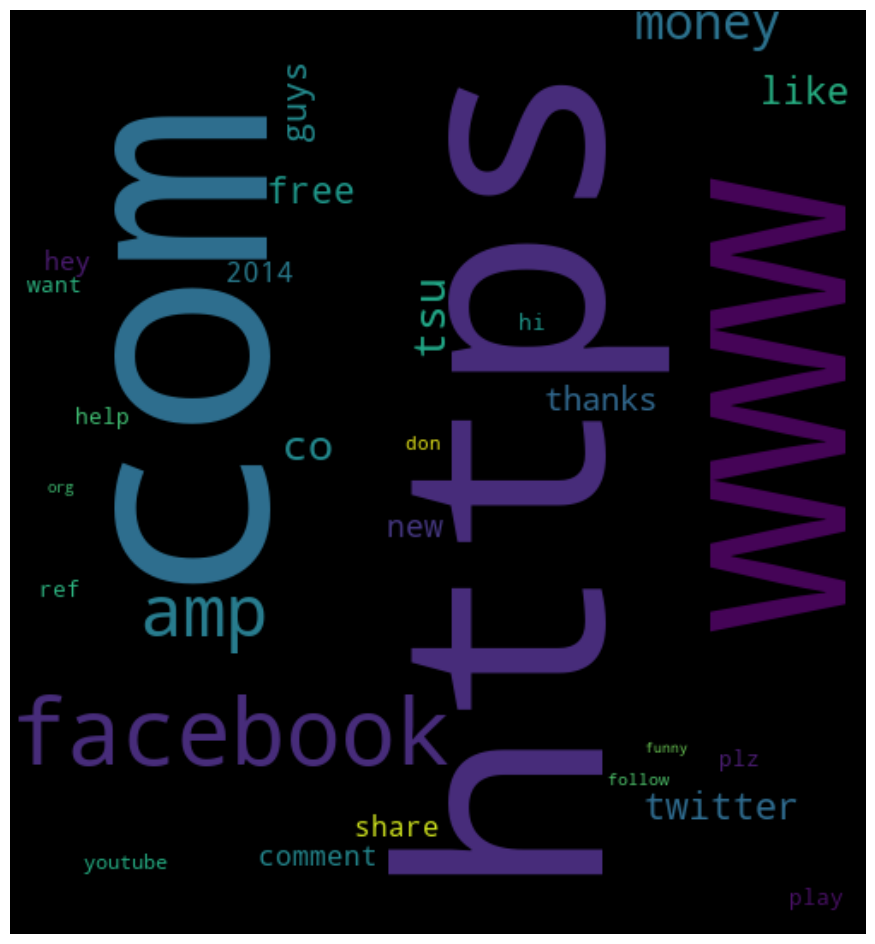

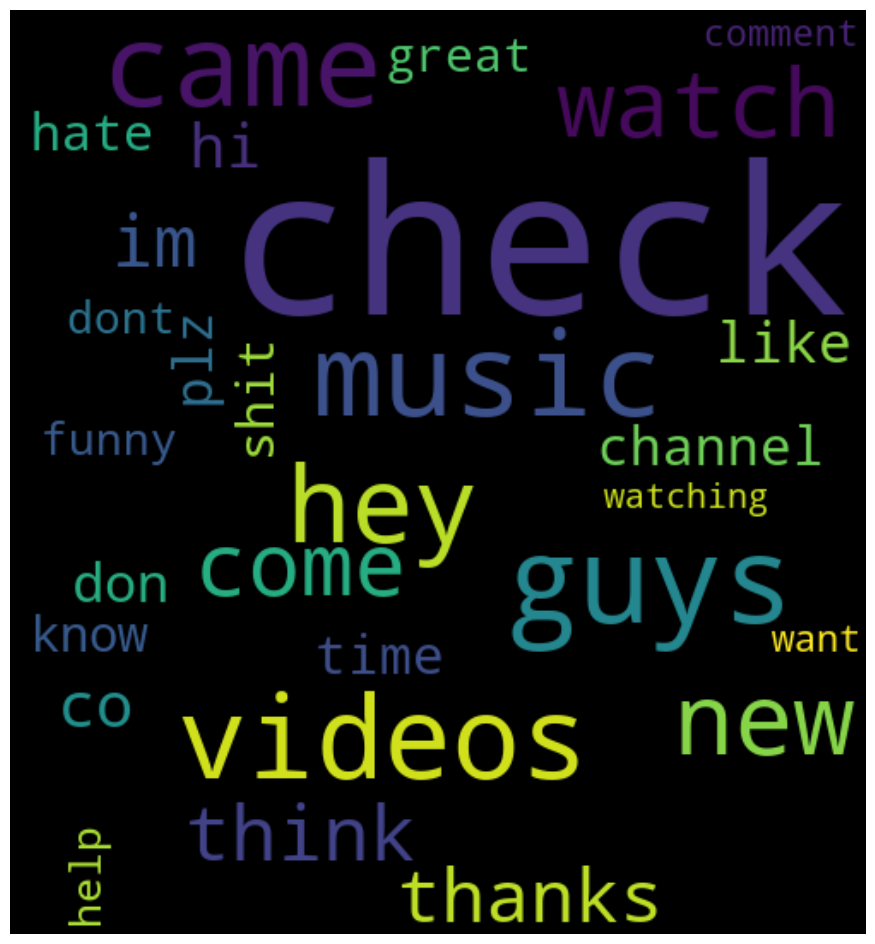

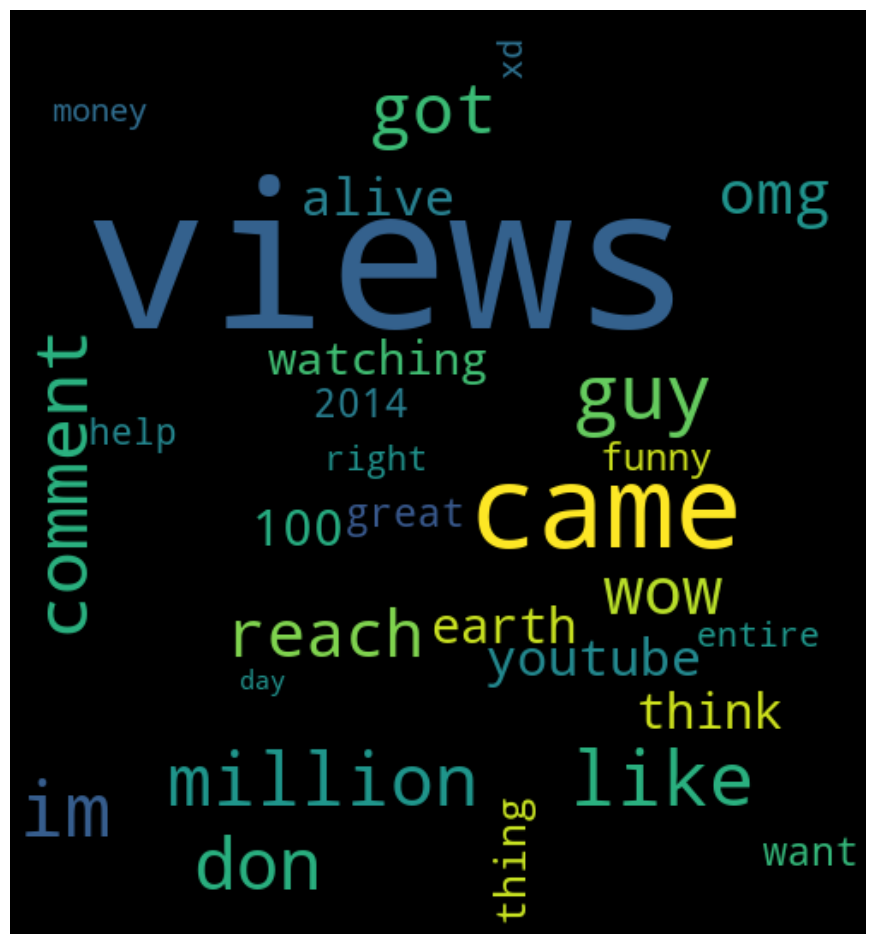

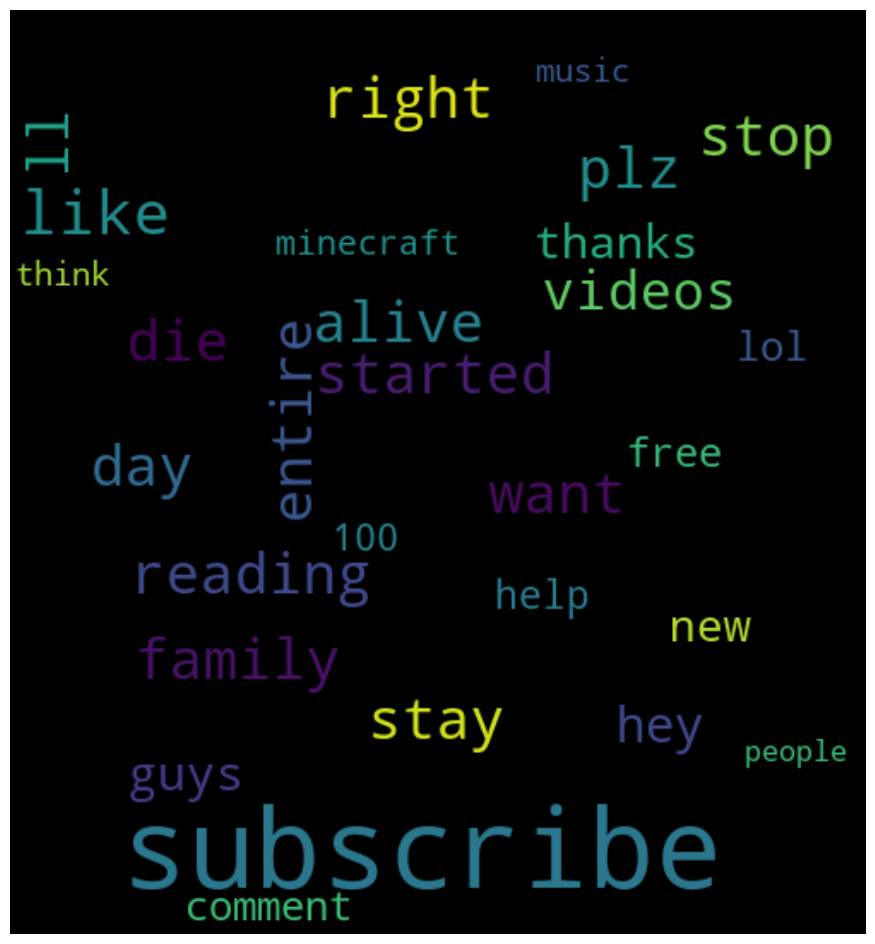

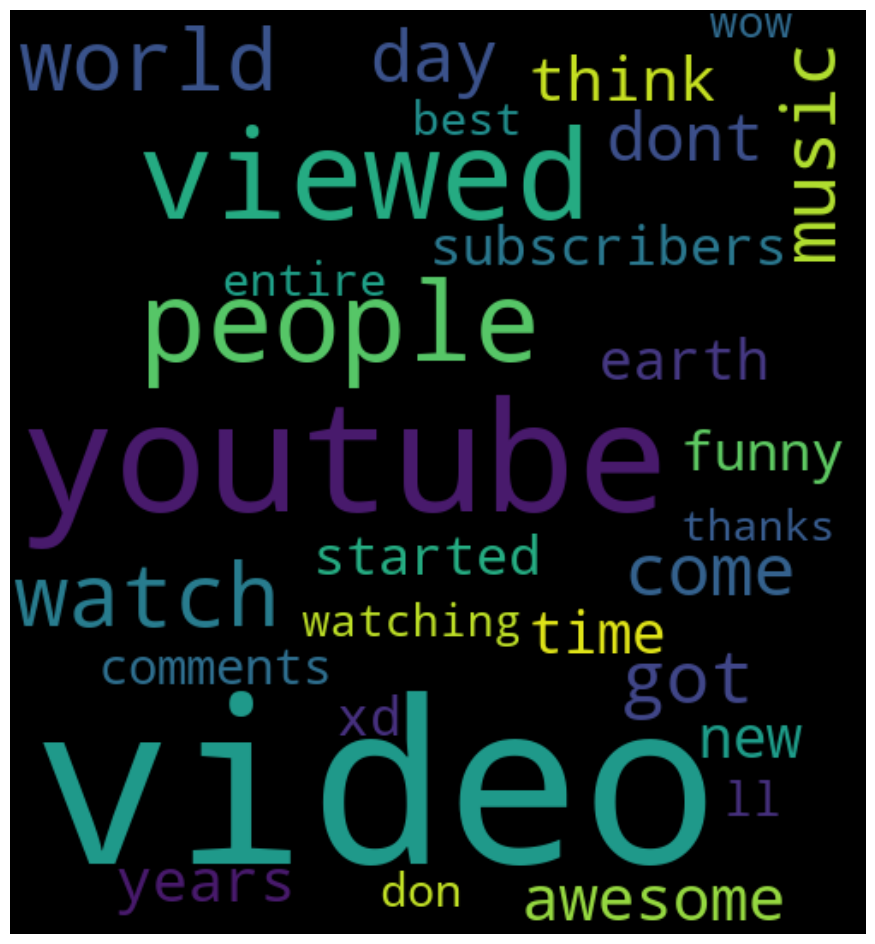

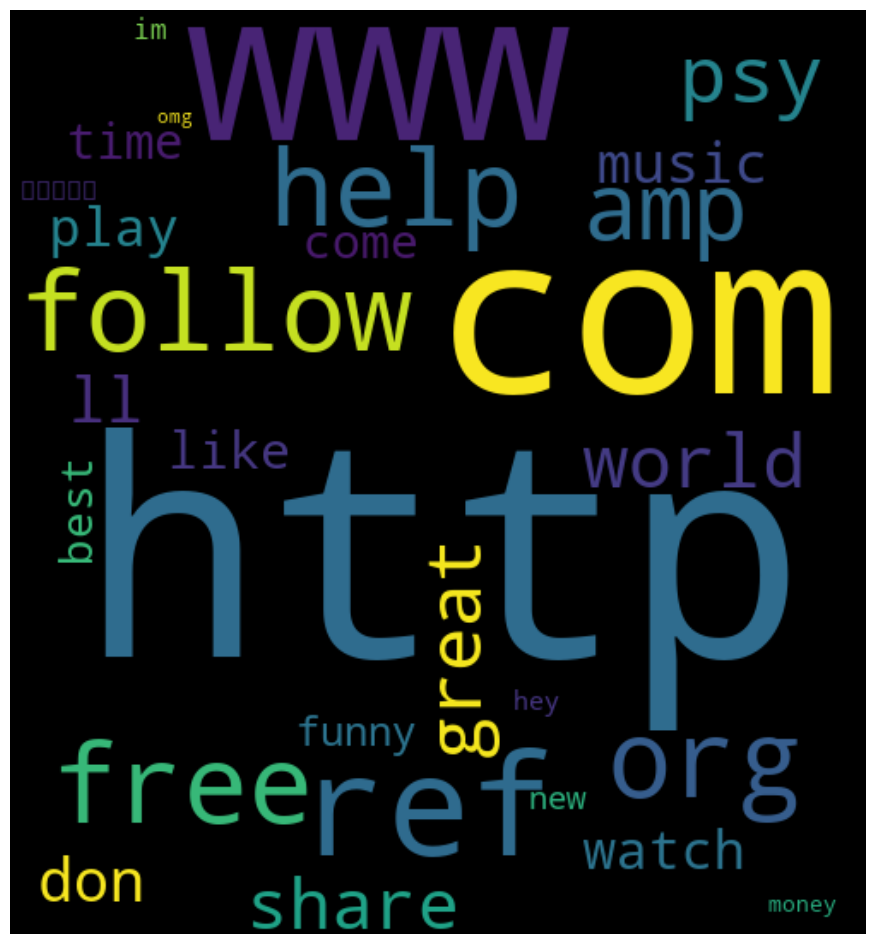

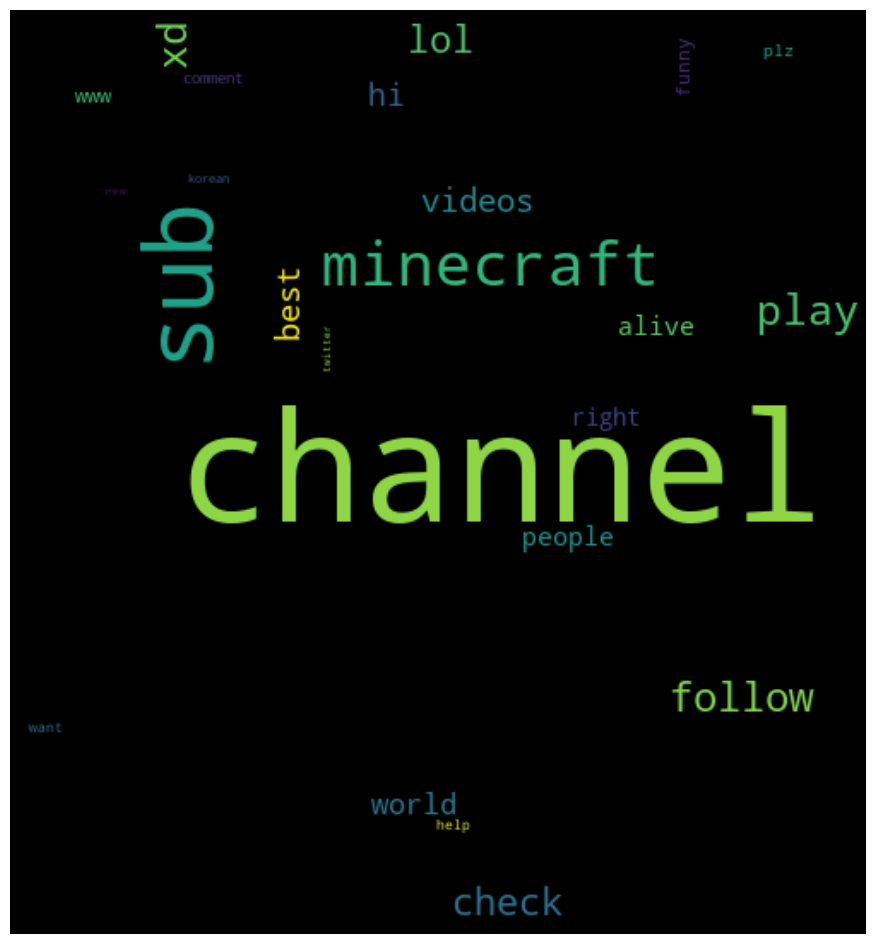

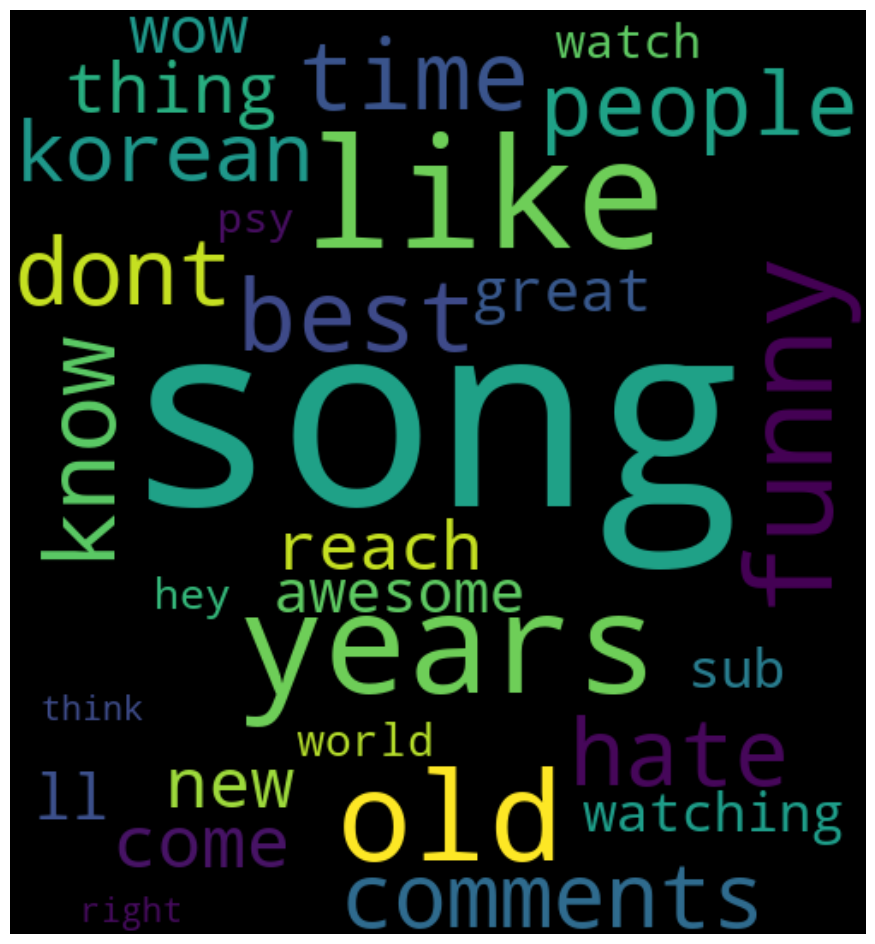

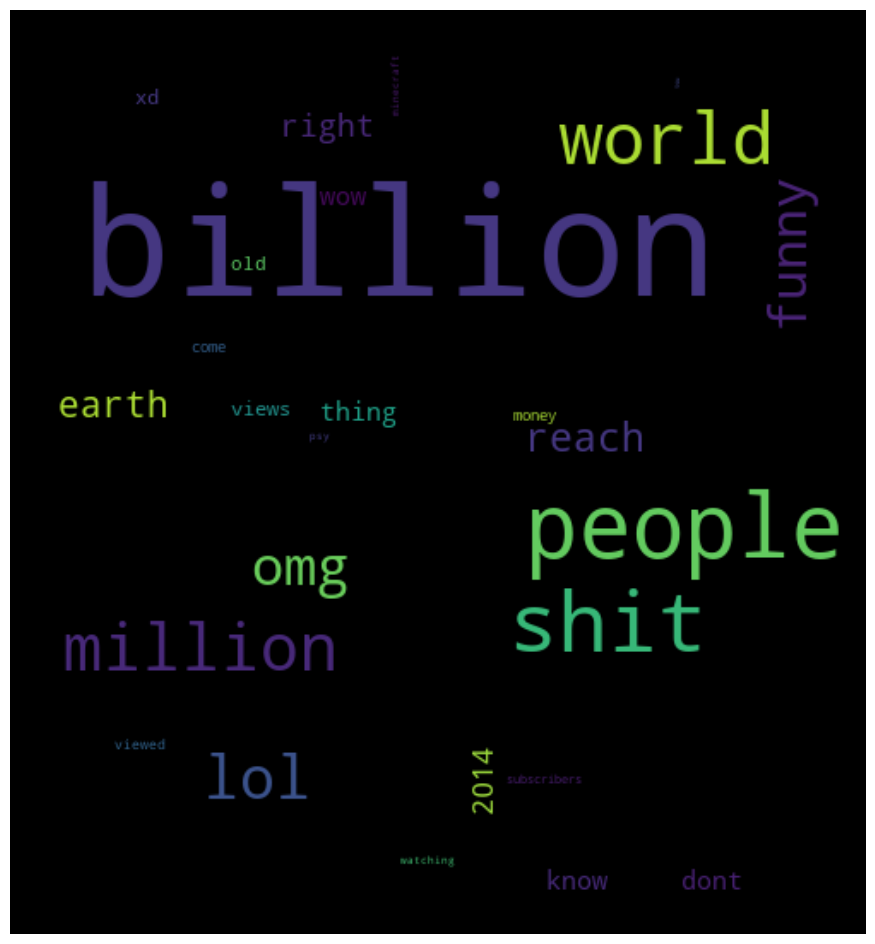

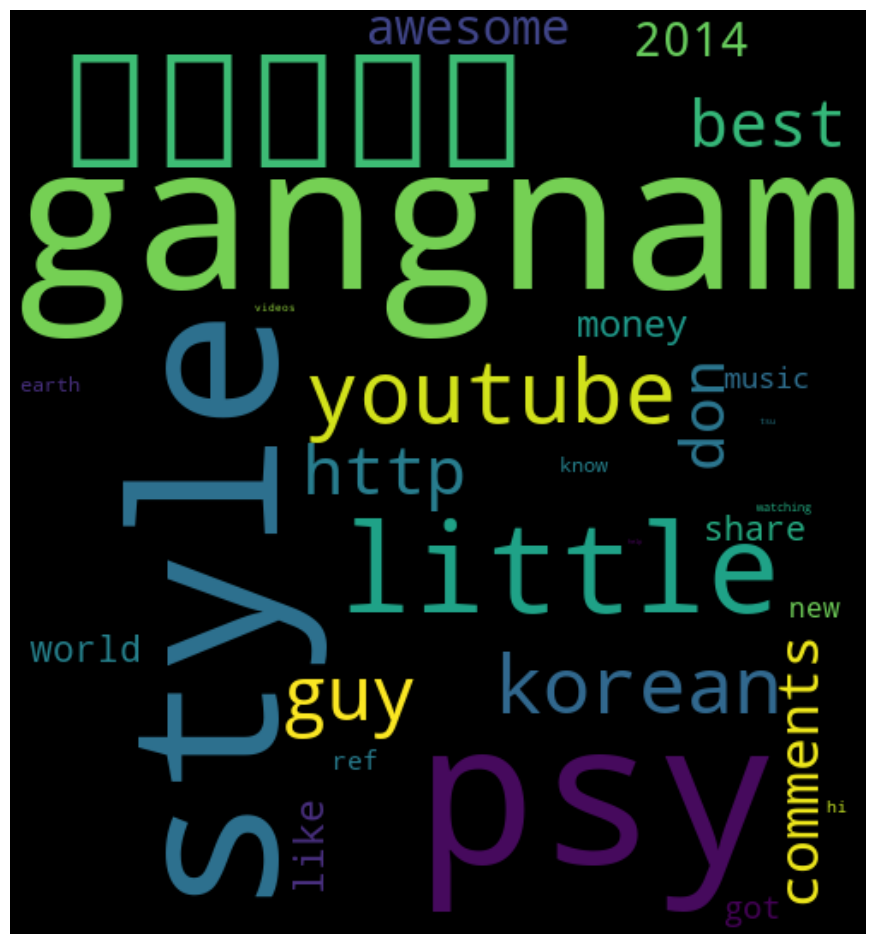

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML


display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="black", max_words=200, width=500, height=540)
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)
# Check the size of your features array
print("Size of features array:", len(count_para_vectorizer.get_feature_names_out()))

# Adjust your function call to ensure the no_top_words parameter is within bounds
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out(), no_top_words=29)



<font size="3"><b>THE LDA WORDCLOUDS</b></font>

Size of features array: 90


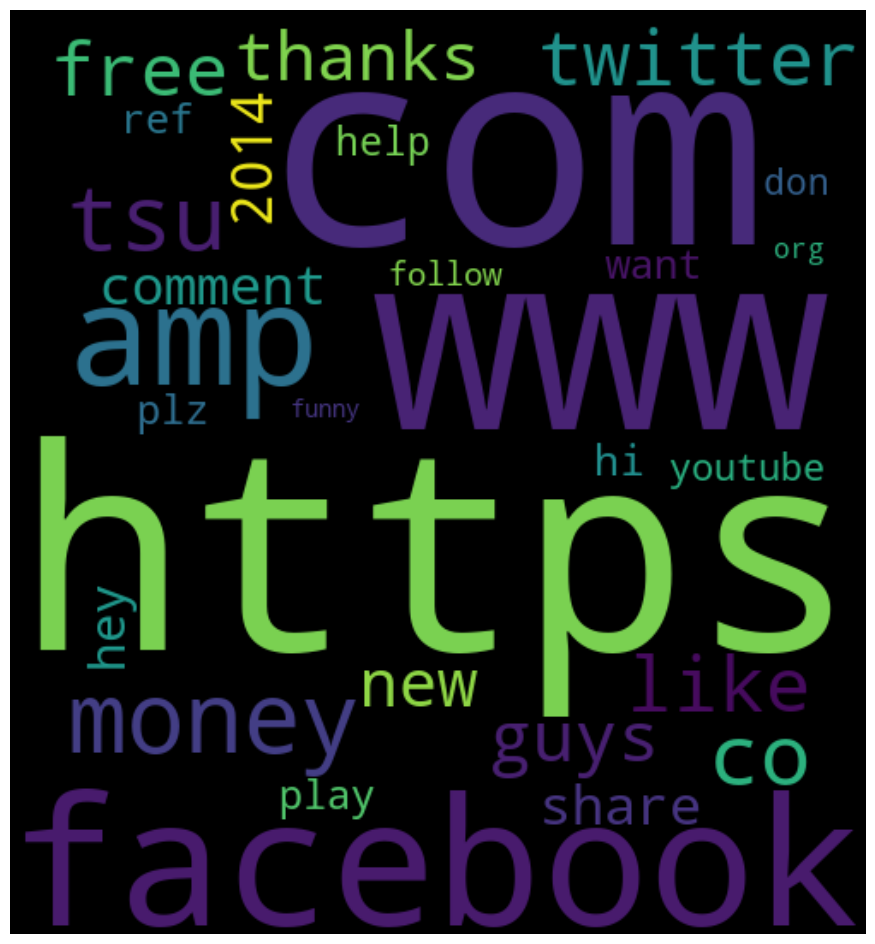

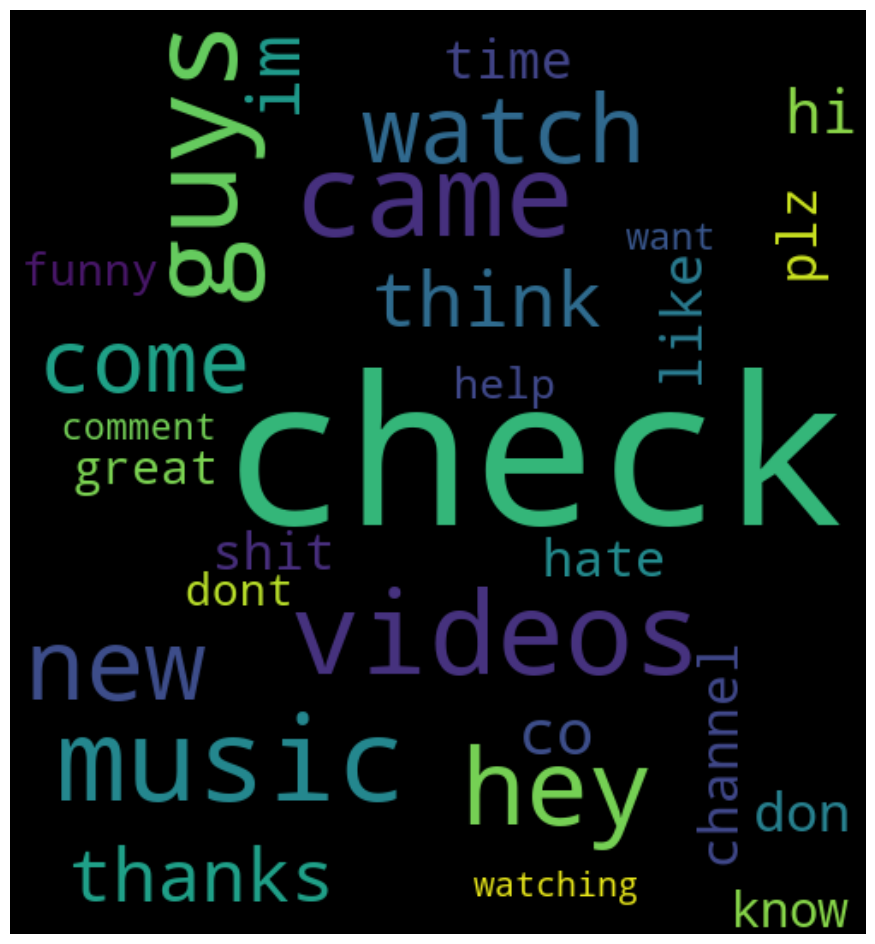

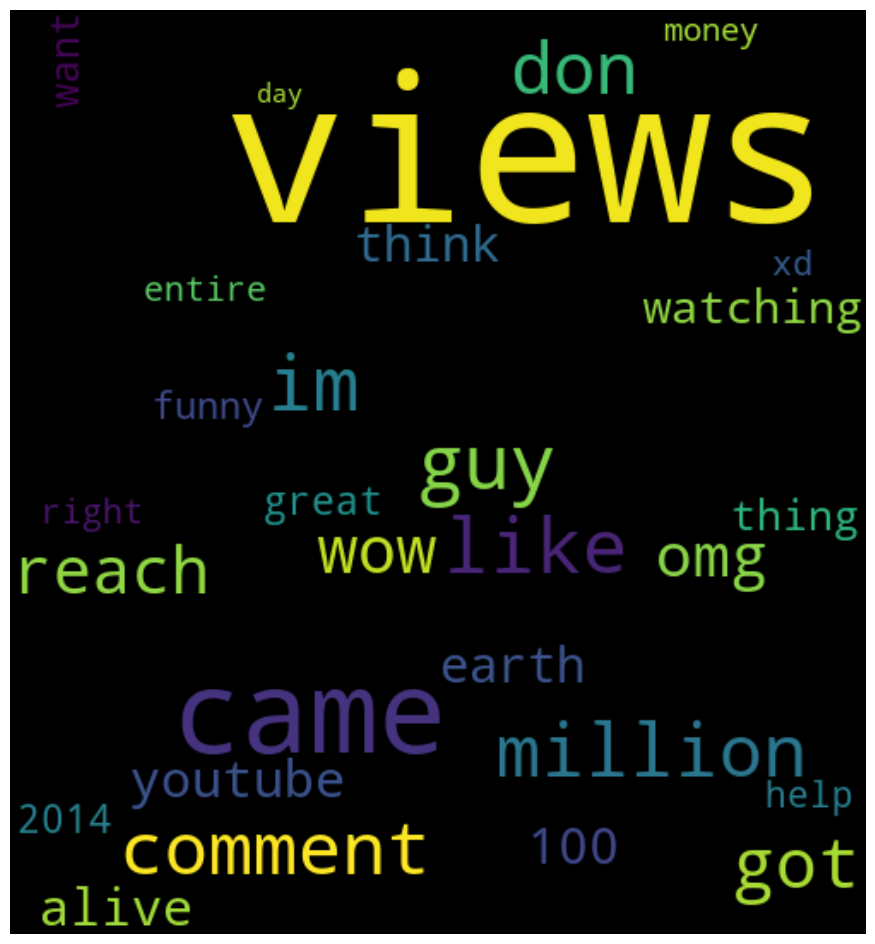

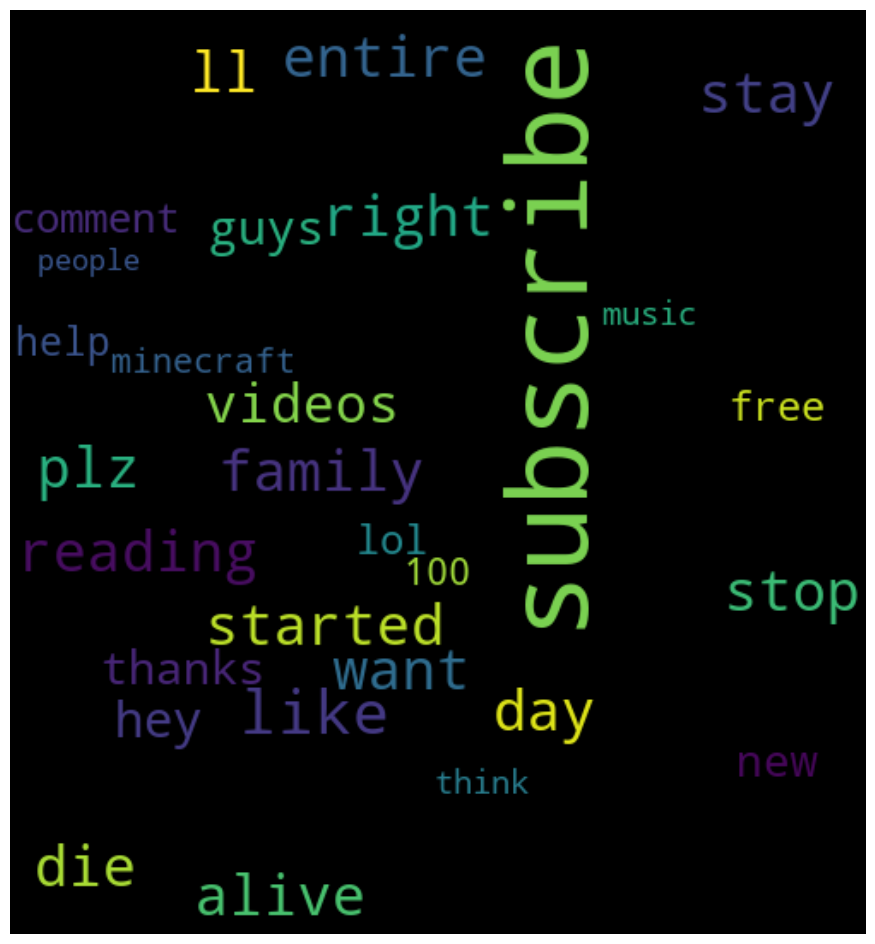

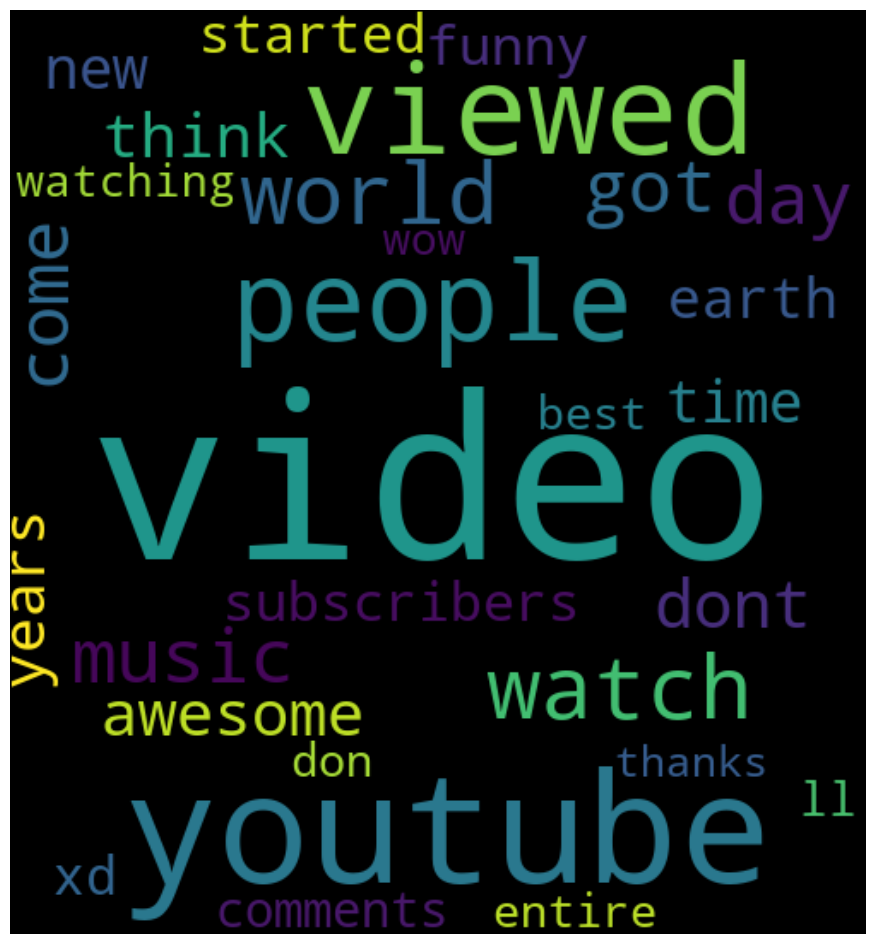

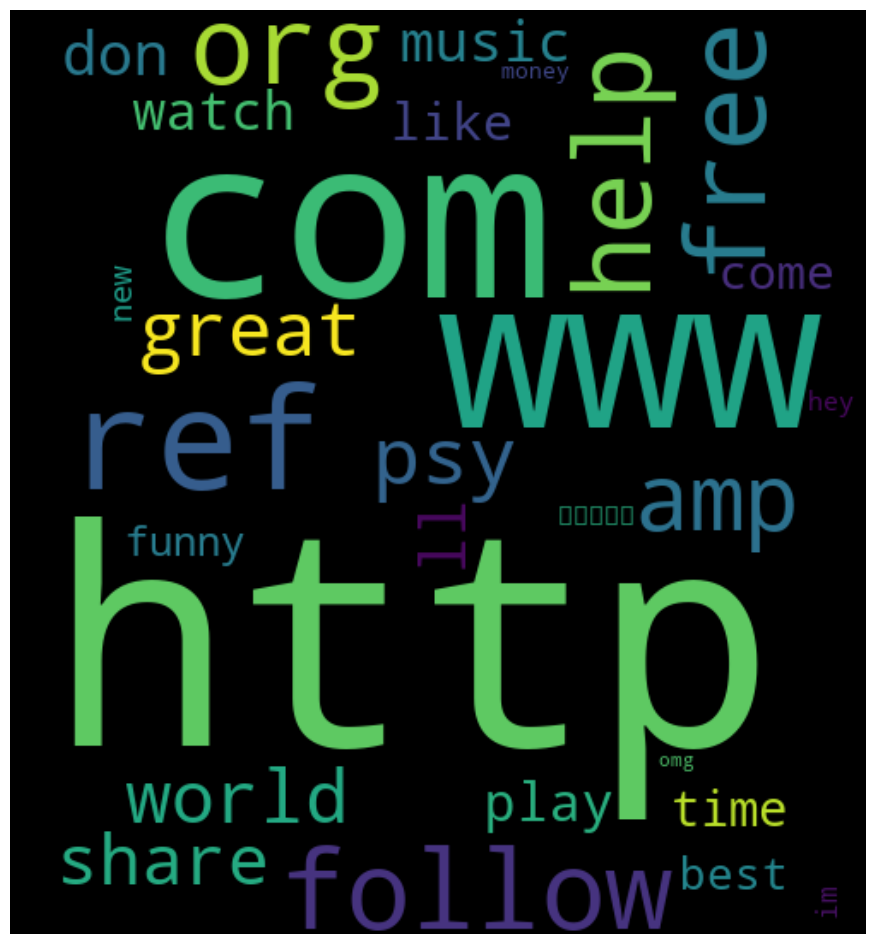

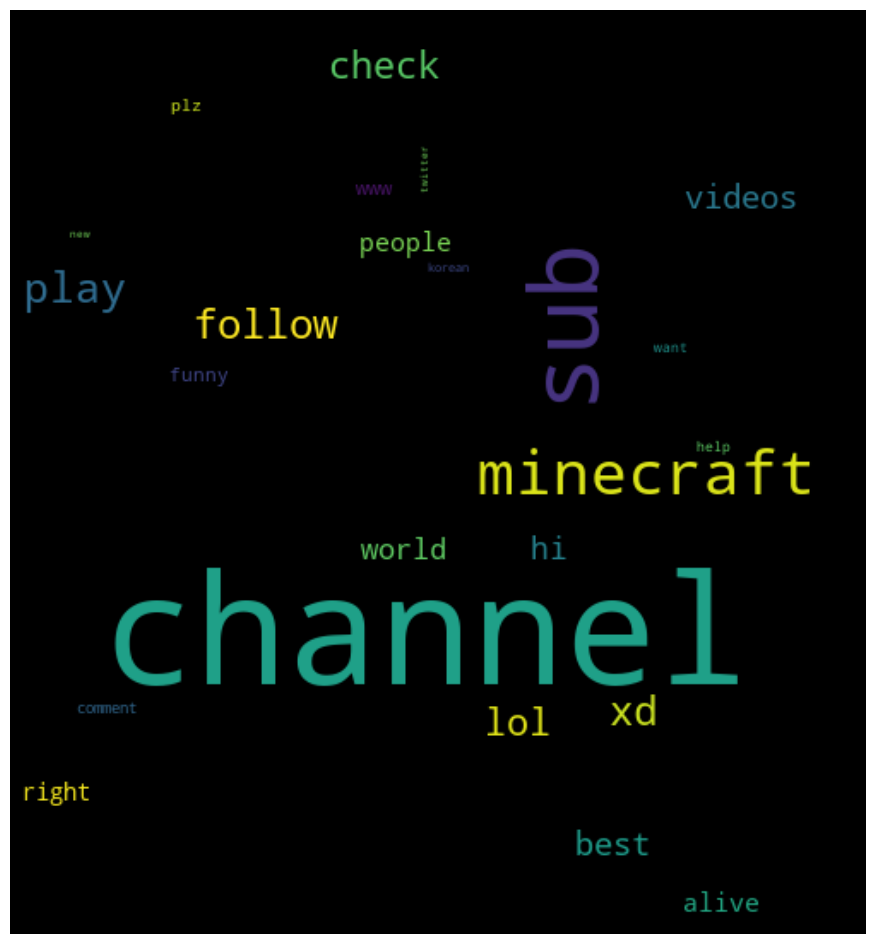

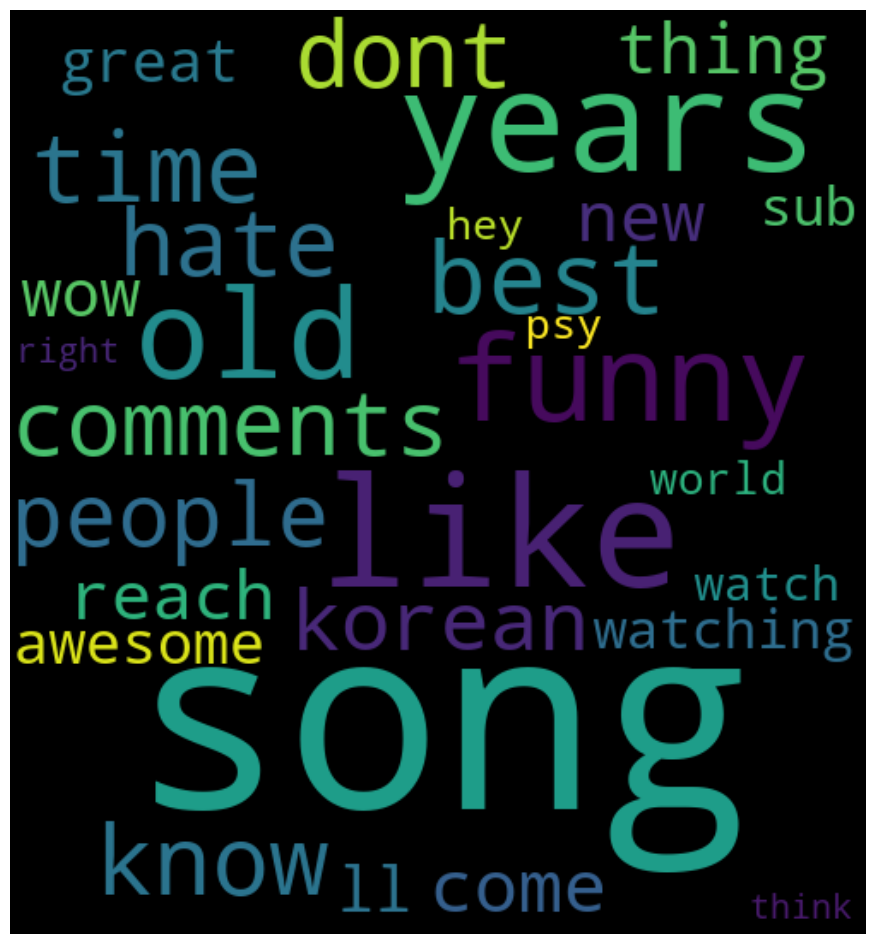

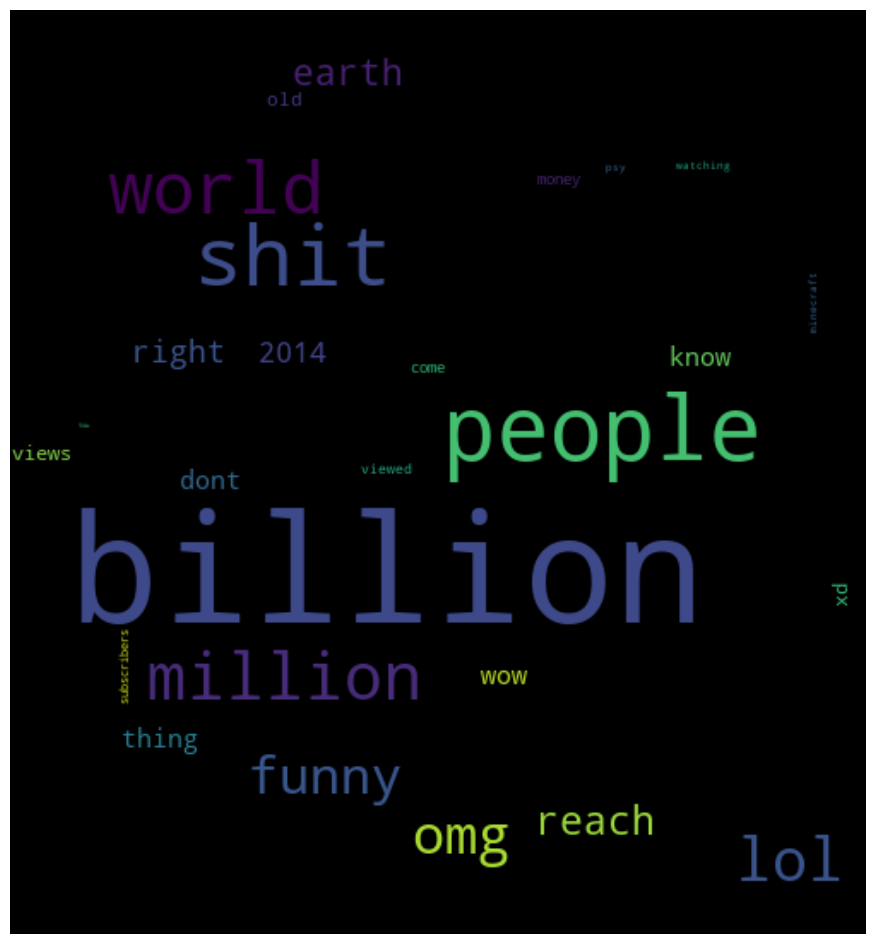

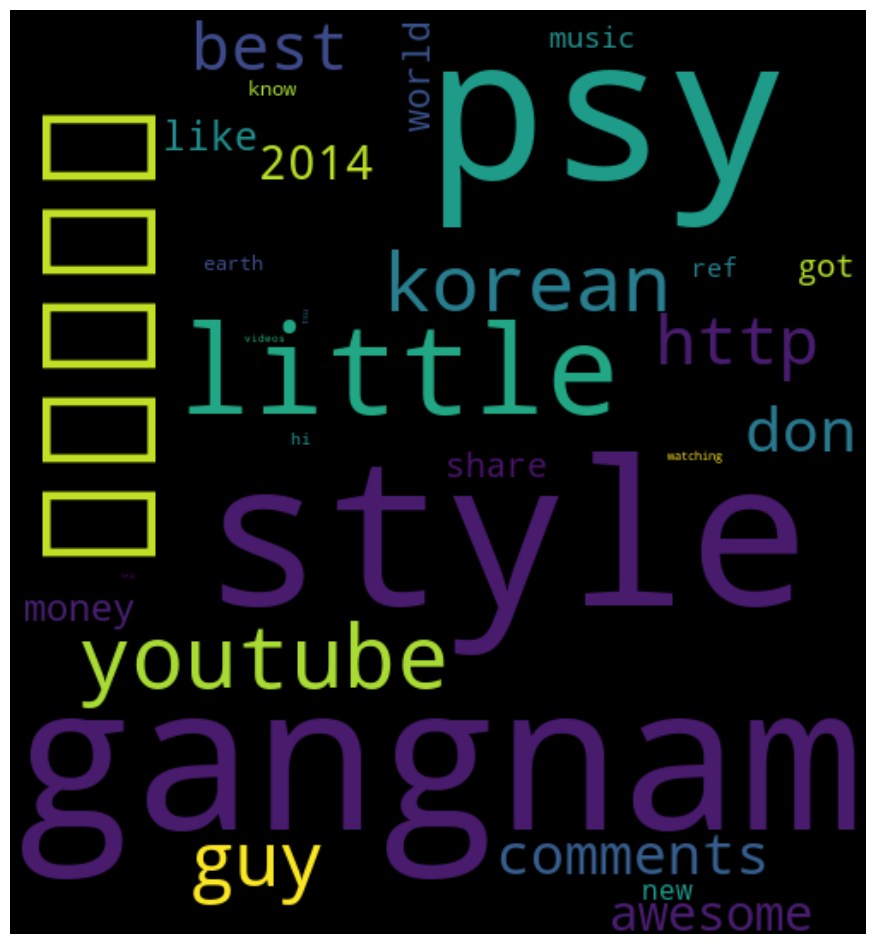

In [21]:
print("Size of features array:", len(count_para_vectorizer.get_feature_names_out()))

# Adjust your function call to ensure the no_top_words parameter is within bounds
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out(), no_top_words=29)


<font size="3"><b>TOPIC NAMES BY JOINING THE TOP 2 WORDS</b></font>

In [22]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)


Vocabulary: ['100' '2014' 'alive' 'amp' 'awesome' 'best' 'billion' 'came' 'channel'
 'check' 'co' 'com' 'come' 'comment' 'comments' 'day' 'die' 'don' 'dont'
 'earth' 'entire' 'facebook' 'family' 'follow' 'free' 'funny' 'gangnam'
 'got' 'great' 'guy' 'guys' 'hate' 'help' 'hey' 'hi' 'http' 'https' 'im'
 'know' 'korean' 'like' 'little' 'll' 'lol' 'million' 'minecraft' 'money'
 'music' 'new' 'old' 'omg' 'org' 'people' 'play' 'plz' 'psy' 'reach'
 'reading' 'ref' 'right' 'share' 'shit' 'song' 'started' 'stay' 'stop'
 'style' 'sub' 'subscribe' 'subscribers' 'thanks' 'thing' 'think' 'time'
 'tsu' 'twitter' 'video' 'videos' 'viewed' 'views' 'want' 'watch'
 'watching' 'world' 'wow' 'www' 'xd' 'years' 'youtube' '강남스타일']
Topic Names: ['Topic https com', 'Topic check guys', 'Topic views came', 'Topic subscribe like', 'Topic video youtube', 'Topic http com', 'Topic channel sub', 'Topic song like', 'Topic billion people', 'Topic gangnam style']


<font size="3"><b>SEPARATE DATA BY YEAR</b></font>

In [23]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(df["CLASS"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(df["CLASS"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

100%|██████████| 2/2 [00:00<00:00, 249.66it/s]


<Axes: xlabel='tweet_id'>

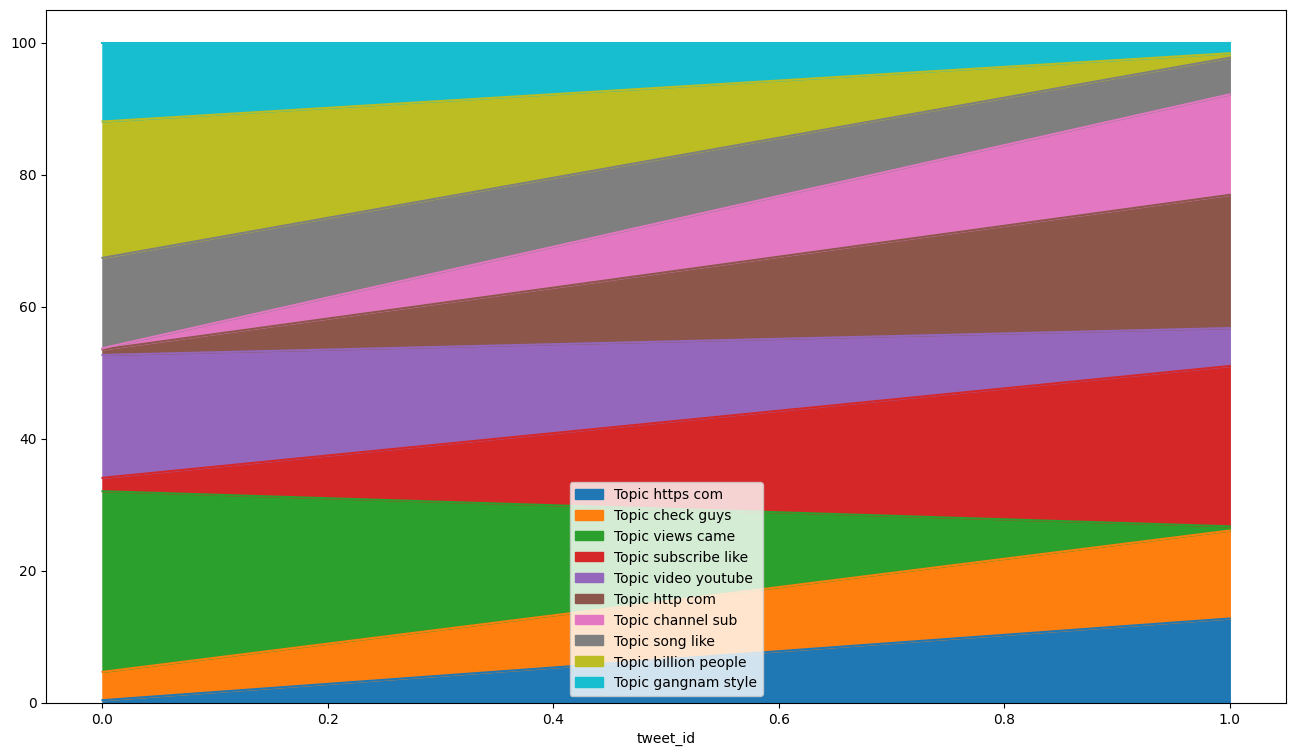

In [24]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["tweet_id"] + topic_names).set_index("tweet_id")
df_year.plot.area(figsize=(16,9))
